# Word Vectorization - Lab

[Solutions](https://github.com/learn-co-curriculum/dsc-word-vectorization-lab)

## Introduction

In this lab, you'll learn how to tokenize and vectorize text documents, create a bag of words, and apply TF-IDF vectorization. The objectives of this lab include:

- Implementing tokenization and count vectorization from scratch
- Implementing TF-IDF from scratch
- Applying dimensionality reduction techniques to visualize vectorized text data

By the end of this lab, you will have gained hands-on experience in these techniques and be able to interpret visualizations of the vectorized text data.

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt', quiet=True)
np.random.seed(0)

### Corpus Overview

In this lab, we have a corpus consisting of 20 documents containing song lyrics from Garth Brooks and Kendrick Lamar albums. The song files are stored in the `data` subdirectory of this lab's folder. Each song is stored in a separate file, named from `song1.txt` to `song20.txt`. 

To conveniently read in all the documents, we can use a list comprehension to create a list that contains the names of all the song files.

In [1]:
filenames = None

In [3]:
filenames = [f'song{str(i)}.txt' for i in range(1,21)]
filenames

['song1.txt',
 'song2.txt',
 'song3.txt',
 'song4.txt',
 'song5.txt',
 'song6.txt',
 'song7.txt',
 'song8.txt',
 'song9.txt',
 'song10.txt',
 'song11.txt',
 'song12.txt',
 'song13.txt',
 'song14.txt',
 'song15.txt',
 'song16.txt',
 'song17.txt',
 'song18.txt',
 'song19.txt',
 'song20.txt']

Next, let's import a single song to see what our text looks like so that we can make sure we clean and tokenize it correctly. 

Use the code in the cell below to read in the lyrics from `song18.txt` as a list of lines, just using vanilla Python:

In [ ]:
# Import and print song18.txt
with open('data/song18.txt') as f:
    test_song = f.readlines()
    
test_song

['[Kendrick Lamar:]\n',
 "Two wrongs don't make us right away\n",
 "Tell me something's wrong\n",
 'Party all of our lives away\n',
 'To take you on\n',
 '[Zacari:]\n',
 'Oh, baby I want you\n',
 'Baby I need you\n',
 'I wanna see you\n',
 'Baby I wanna go out yeah\n',
 'Baby I wanna go out yeah\n',
 'Baby I want you\n',
 'Baby I need you\n',
 'I wanna see you\n',
 'Baby I wanna go out yeah\n',
 'Baby I wanna go out yeah\n',
 'All night (all night, all night)\n',
 'All night\n',
 "Your body's on fire\n",
 'And your drinks on ice\n',
 'All night (all night, all night)\n',
 'All night\n',
 "Your body's on fire\n",
 'And your drinks on ice\n',
 '[Babes Wodumo:]\n',
 'Oh my word oh my gosh oh my word (Oh my gosh)\n',
 'Oh my word oh my gosh oh my word (Oh my gosh)\n',
 'Oh my word oh my gosh oh my word (Oh my gosh)\n',
 'Oh my word oh my gosh oh my word (Oh my gosh)\n',
 'Everybody say kikiritikiki (kikiritikiki)\n',
 'Everybody say kikiritikiki (kikiritikiki)\n',
 'Everybody say kikiritik

### Tokenizing Data

Before creating a bag of words or vectorizing each document, it is necessary to clean up the data and split each song into individual words. Tokenization is the process of breaking down text into smaller units, such as words or tokens.

Consider the example sentences:

`"Two wrongs don't make us right away\n", "Tell me something's wrong\n"`

After tokenization, they would look like:

`['two', 'wrongs', 'dont', 'make', 'us', 'right', 'away', 'tell', 'me', 'somethings', 'wrong']`

Tokenization can be a tedious task if done manually, involving regular expressions and handling various symbols and punctuation. However, to streamline the process and focus on more important tasks, we can use existing tools. In this lab, we will leverage the `nltk` library, short for _Natural Language Tool Kit_, which provides powerful tokenization capabilities.

**_NOTE:_** If you encounter an error related to missing packages when using `nltk`, it may require additional dependencies to be installed. Follow the instructions provided in the error message to install the required packages, and then rerun the cell.

### Preparing for Tokenization

Before tokenizing the data, an additional step is required to ensure proper handling of the text. Computers have specific requirements when working with strings, and without addressing them, we may encounter issues:

- Counting non-word elements: Some text may contain notes or annotations that are not part of the actual lyrics, such as `"[Kendrick Lamar:]"`. These elements should be removed to avoid incorrect word counts.
- Punctuation and capitalization: Python interprets words with different capitalization or punctuation as unique, leading to separate counts. To ensure accurate counting, we need to remove punctuation and convert all words to lowercase.

To address these concerns, we'll perform a manual cleaning step before tokenizing the songs. In the following cell, write a function that performs the following tasks:

- Remove lines containing only `['artist names']`.
- Join the list of strings into a single string representing the entire song.
- Remove newline characters (`\n`).
- Remove the following punctuation marks: `",.'?!()"`
- Convert all words to lowercase.

Test the function using `test_song` to demonstrate that it successfully removes `'[Kendrick Lamar:]'` and other artist names, returns the song as a single string (not a list of strings), removes newlines and punctuation, and converts all words to lowercase.

In [ ]:
def clean_song(song):
    pass

clean_test_song = clean_song(test_song)
print(clean_test_song)

In [ ]:
def clean_song(song):
    clean_lines = [line for line in song if "[" not in line and "]" not in line]
    clean_song = " ".join(clean_lines)
    for symbol in ",.'?!()":
        clean_song = clean_song.replace(symbol, "")
    clean_song = clean_song.replace("\n", " ")
    return clean_song.lower()
    
clean_test_song = clean_song(test_song)
print(clean_test_song)

two wrongs dont make us right away  tell me somethings wrong  party all of our lives away  to take you on  oh baby i want you  baby i need you  i wanna see you  baby i wanna go out yeah  baby i wanna go out yeah  baby i want you  baby i need you  i wanna see you  baby i wanna go out yeah  baby i wanna go out yeah  all night all night all night  all night  your bodys on fire  and your drinks on ice  all night all night all night  all night  your bodys on fire  and your drinks on ice  oh my word oh my gosh oh my word oh my gosh  oh my word oh my gosh oh my word oh my gosh  oh my word oh my gosh oh my word oh my gosh  oh my word oh my gosh oh my word oh my gosh  everybody say kikiritikiki kikiritikiki  everybody say kikiritikiki kikiritikiki  everybody say kikiritikiki kikiritikiki  everybody say kikiritikiki kikiritikiki  ungbambe ungdedele ungbhasobhe unggudluke  ungbambe ungdedele ungbhasobhe unggudluke  ungbambe ungdedele ungbhasobhe unggudluke  ungbambe ungdedele ungbhasobhe unggudlu

Great! Now, we can use `nltk`'s `word_tokenize()` function on the song string to get a fully tokenized version of the song. Test this function on `clean_test_song` to ensure that the function works. 

In [ ]:
tokenized_test_song = None

In [ ]:
tokenized_test_song = word_tokenize(clean_test_song)
tokenized_test_song[:10]

### Vectorizing Text: Count Vectorization

To enable machine learning algorithms to process text, we need to convert it into a numerical representation. Vectorization is the process of representing text as vectors or matrices, where each element corresponds to a word in the vocabulary.

Count vectorization converts text into a vector, where each element represents a unique word in the vocabulary. The vector's length is determined by the entire vocabulary, typically consisting of all the words in the English language or those present in our corpus. Each sentence can be represented by a vector, with the value of each element indicating the frequency of that word in the sentence.

For example, the sentence "I scream, you scream, we all scream for ice cream" can be represented as a vector:

| 'aardvark' | 'apple' | [...] | 'I' | 'you' | 'scream' | 'we' | 'all' | 'for' | 'ice' | 'cream' | [...] | 'xylophone' | 'zebra' |
|:----------:|:-------:|:-----:|:---:|:-----:|:--------:|:----:|:-----:|:-----:|:-----:|:-------:|:-----:|:-----------:|:-------:|
|      0     |    0    |   0   |  1  |   1   |     3    |   1  |   1   |   1   |   1   |    1    |   0   |      0      |    0    |

This is known as a sparse representation, where most elements in the vector have a value of 0. The presence of a word in the sentence is indicated by a non-zero value, such as 1, while words not present in the sentence have a value of 0.

Alternatively, we can represent the sentence as a dictionary of word frequency counts:

```python
BoW = {
    'I': 1,
    'you': 1,
    'scream': 3,
    'we': 1,
    'all': 1,
    'for': 1,
    'ice': 1,
    'cream': 1
}
```

Both representations exemplify count vectorization, allowing us to capture the frequency of each word and represent sentences as vectors.

It's important to note that count vectorization using the Bag of Words approach does not preserve the order of words in the sentence. Sentences containing the same words will result in identical vectors, even if the meanings are different.

In the cell below, create a function that takes in a tokenized, cleaned song and returns a count vectorized representation of it as a Python dictionary.

**_Hint:_**  Consider using a `set()` since you'll need each unique word in the tokenized song! 

In [ ]:
def count_vectorize(tokenized_song):
    pass

test_vectorized = count_vectorize(tokenized_test_song)
print(test_vectorized)

In [ ]:
def count_vectorize(tokenized_song):
    unique_words = set(tokenized_song)

    song_dict = {word:0 for word in unique_words}

    for word in tokenized_song:
        song_dict[word] += 1

    return song_dict

test_vectorized = count_vectorize(tokenized_test_song)
print(test_vectorized)

### TF-IDF Vectorization: Summarizing Document Contents

TF-IDF (Term Frequency, Inverse Document Frequency) is an advanced form of vectorization that assigns weights to each term in a document based on its uniqueness within the document and across the corpus. It allows us to summarize the document's contents using key words.

TF-IDF considers the term frequency, which is the frequency of a term in a document, and the inverse document frequency, which measures the rarity of the term across all documents. A term that appears frequently in many documents is deemed less unique and less informative for distinguishing the document. On the other hand, a term that occurs frequently within a document but rarely in the rest of the corpus is considered more important in representing the document.

The TF-IDF formula calculates the weight of each term by multiplying its term frequency with its inverse document frequency. We have already obtained the term frequency using Count Vectorization, as demonstrated earlier.

TF-IDF vectorization enables us to capture the significance of terms within a document, highlighting their importance in representing the document's unique characteristics.

The IDF (Inverse Document Frequency) calculation requires all the documents in our corpus, not just an individual document. We will postpone testing this function for now.

In the following cell, write a function that takes a list of tokenized songs as input. Each item in the list should be a clean, tokenized version of a song. The function should return a dictionary containing the IDF values for each word.

The IDF formula is:

$$\text{IDF}(t) =  \log_e\left(\frac{\text{Total Number of Documents}}{\text{Number of Documents with } t \text{ in it}}\right)$$

In [ ]:
def inverse_document_frequency(list_of_token_songs):
    pass

In [ ]:
def inverse_document_frequency(list_of_token_songs):
    num_docs = len(list_of_token_songs)
    
    unique_words = set([item for sublist in list_of_token_songs for item in sublist])
    # Same as:
    # unique_words = set()
    # for song in list_of_dicts:
    #     for word in song.keys():
    #         unique_words.add(word)
            
    inv_doc_freq = {word:0 for word in unique_words}

    for word in unique_words:
        num_docs_with_word = 0
        for song_tokens in list_of_token_songs:
            if word in song_tokens:
                num_docs_with_word += 1
        inv_doc_freq[word] = np.log(num_docs / num_docs_with_word)
        
    return inv_doc_freq

To compute the overall TF-IDF value, we simply multiply the Term Frequency (TF) and the Inverse Document Frequency (IDF).

In the following cell, complete the `tf_idf()` function. This function takes a list of tokenized songs as input, similar to the `inverse_document_frequency()` function. It returns a new list of dictionaries, where each dictionary represents the TF-IDF vectorized representation of a song document. To calculate the term frequency for each song, use the `count_vectorize()` function defined above.

**_NOTE:_** Each document should include the entire vocabulary of the combined corpus. So, even if a song does not contain a specific word, it should have a dictionary entry for that word with a value of `0`.

In [ ]:
def tf_idf(list_of_token_songs):
    pass

In [ ]:
def tf_idf(list_of_token_songs):
    
    unique_words = set([item for sublist in list_of_token_songs for item in sublist])
    
    idf = inverse_document_frequency(list_of_token_songs)
    
    tf_idf_list_of_dicts = []
    for song_tokens in list_of_token_songs:
        song_tf = count_vectorize(song_tokens)
        doc_tf_idf = {word:0 for word in unique_words}
        for word in unique_words:
            if word in song_tokens:
                doc_tf_idf[word] = song_tf[word] * idf[word]
            else:
                doc_tf_idf[word] = 0
        tf_idf_list_of_dicts.append(doc_tf_idf)
        
    return tf_idf_list_of_dicts

### Vectorizing All Documents

Now that we've created all the necessary helper functions, we can load in all of our documents and run each through the vectorization pipeline we've just created.

In the cell below, complete the `main()` function.  This function should take in a list of file names (provided for you in the `filenames` list we created at the start), and then:

- Read in each document into a list of raw songs (where each song is a list of strings)
- Tokenize each document into a list of cleaned and tokenized songs
- Return a list of dictionaries vectorized using `tf-idf`, where each dictionary is a vectorized representation of each song 

In [ ]:
def main(filenames):
    pass

tf_idf_all_docs = main(filenames)

In [ ]:
def main(filenames):

    all_songs = []
    for song in filenames:
        with open(f'data/{song}') as f:
            song_lyrics = f.readlines()
            all_songs.append(song_lyrics)
    
    all_song_tokens = []

    for song in all_songs:
        song_tokens = word_tokenize(clean_song(song))
        all_song_tokens.append(song_tokens)

    tf_idf_all_docs = tf_idf(all_song_tokens)
    return tf_idf_all_docs

tf_idf_all_docs = main(filenames)

### Visualizing our Vectorizations

Now that we have a tf-idf representation of each document, we can move on to the fun part -- visualizing everything!

In the cell below, examine our dictionaries to figure out how many dimensions our dataset has. 

**_HINT_**: Remember that every word is its own dimension!

In [ ]:
num_dims = None
print(f"Number of Dimensions: {num_dims}")

In [ ]:
vocab = list(tf_idf_all_docs[0].keys())
num_dims = len(vocab)
# Same as:
# num_dims = len(tf_idf_all_docs[0])
print(f"Number of Dimensions: {num_dims}")

To visualize the data in a comprehensible way, we need to reduce the dimensionality to 2 or 3 dimensions. One popular technique for this purpose is t-SNE (t-Stochastic Neighbors Embedding), which we will use by leveraging scikit-learn's implementation.

To begin, we need to extract the values from the dictionaries in `tf_idf_all_docs` and convert them into lists. This step is necessary because t-SNE operates on array-like objects rather than dictionaries.

In the following cell, create a list of lists that contains the values from each dictionary in `tf_idf_all_docs`. Each inner list should represent the values of a specific dictionary in the same order.

In [ ]:
tf_idf_vals_list = None

tf_idf_vals_list[0][:10]

In [ ]:
tf_idf_vals_list = []

for i in tf_idf_all_docs:
    tf_idf_vals_list.append(list(i.values()))
    
tf_idf_vals_list[0][:10]

Now that we have only the values, we can use the `TSNE()` class from `sklearn` to transform our data appropriately. In the cell below, instantiate `TSNE()` with the following arguments:
- `n_components=3` (so we can compare 2 vs 3 components when graphing)
- `perplexity=19` (the highest number of neighbors explored given the size of our dataset)
- `learning_rate=200` (a higher learning rate than using 'auto', to avoid getting stuck in a local minimum)
- `init='random'` (so SKLearn will randomize the initialization)
- `random_state=13` (so that random initialization won't be TOO random)

Then, use the created object's `.fit_transform()` method to transform the data stored in `tf_idf_vals_list` into 3-dimensional data.  Then, inspect the newly transformed data to confirm that it has the correct dimensionality. 

In [ ]:
t_sne_object_3d = None

transformed_data_3d = t_sne_object_3d.fit_transform(np.array(tf_idf_vals_list))
transformed_data_3d

In [ ]:
t_sne_object_3d = TSNE(n_components = 3, 
                       perplexity = 19,
                       learning_rate = 200,
                       init = 'random',
                       random_state = 13)

transformed_data_3d = t_sne_object_3d.fit_transform(np.array(tf_idf_vals_list))
transformed_data_3d

We'll also want to check out how the visualization looks in 2d.  Repeat the process above, but this time, instantiate `TSNE()` with 2 components instead of 3.  Again, use `.fit_transform()` to transform the data and store it in the variable below, and then inspect it to confirm the transformed data has only 2 dimensions. 

In [ ]:
t_sne_object_2d = None

transformed_data_2d = t_sne_object_2d.fit_transform(np.array(tf_idf_vals_list))
transformed_data_2d

In [ ]:
t_sne_object_2d = TSNE(n_components = 2, 
                       perplexity = 19,
                       learning_rate = 200,
                       init = 'random', 
                       random_state = 13)
transformed_data_2d = t_sne_object_2d.fit_transform(np.array(tf_idf_vals_list))
transformed_data_2d

array([[   9.131497,  192.4554  ],
       [  39.943512,  -24.710934],
       [ -64.817924, -184.46954 ],
       [  34.589966, -121.292854],
       [ -33.374043,   17.676756],
       [  42.73739 , -221.02606 ],
       [ 216.30211 ,  -36.537342],
       [ -64.782486,  100.61542 ],
       [-151.17363 , -120.476555],
       [  35.22803 ,   87.416084],
       [-110.05348 ,  189.24815 ],
       [ 201.78235 ,   81.97899 ],
       [ -49.9226  ,  -79.616264],
       [-172.5719  ,   85.023346],
       [ 121.75673 ,  -68.67192 ],
       [ 115.704735,  156.64336 ],
       [-218.51846 ,  -26.548355],
       [-119.27539 ,   -8.823249],
       [ 150.39188 , -164.9615  ],
       [ 113.99761 ,   33.689175]], dtype=float32)

Now, let's visualize everything!  Run the cell below to view both 3D and 2D visualizations of the songs.

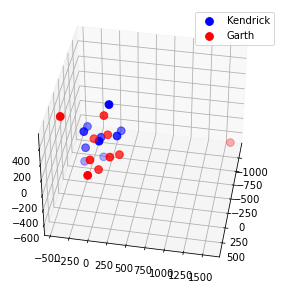

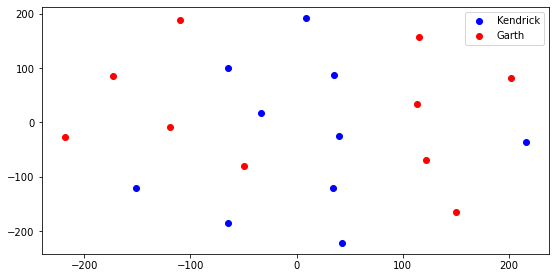

In [ ]:
kendrick_3d = transformed_data_3d[:10]
k3_x = [i[0] for i in kendrick_3d]
k3_y = [i[1] for i in kendrick_3d]
k3_z = [i[2] for i in kendrick_3d]

garth_3d = transformed_data_3d[10:]
g3_x = [i[0] for i in garth_3d]
g3_y = [i[1] for i in garth_3d]
g3_z = [i[2] for i in garth_3d]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(k3_x, k3_y, k3_z, c='b', s=60, label='Kendrick')
ax.scatter(g3_x, g3_y, g3_z, c='red', s=60, label='Garth')
ax.view_init(40,10)
ax.legend()
plt.show()

kendrick_2d = transformed_data_2d[:10]
k2_x = [i[0] for i in kendrick_2d]
k2_y = [i[1] for i in kendrick_2d]

garth_2d = transformed_data_2d[10:]
g2_x = [i[0] for i in garth_2d]
g2_y = [i[1] for i in garth_2d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(222)
ax.scatter(k2_x, k2_y, c='b', label='Kendrick')
ax.scatter(g2_x, g2_y, c='red', label='Garth')
ax.legend()
plt.show()

Interesting! Take a crack at interpreting these graphs by answering the following questions below:

What does each graph mean? Do you find one graph more informative than the other? Do you think that this method shows us discernable differences between Kendrick Lamar songs and Garth Brooks songs?  Use the graphs and your understanding of TF-IDF to support your answer.  

In [ ]:
'''
WRITE YOUR ANSWER HERE
'''

## Summary

In this lab, we used our newfound NLP skills to generate some statistics specific to text data, and used them to compare two different works! 

# Corpus Statistics - Lab

[Solution](https://github.com/learn-co-curriculum/dsc-corpus-statistics-lab)

## Introduction

In this lab, we'll learn how to use various NLP techniques to generate descriptive statistics to explore a text corpus!

## Objectives

You will be able to:

- Generate common corpus statistics using NLTK 
- Use a count vectorization strategy to create a bag of words 
- Compare two different text corpora using corpus statistics generated by NLTK 


## Getting Started

In this lab, we'll load two different text corpora from NLTK's library of various texts, and then explore and compare each corpus using some basic statistical measures and techniques common in NLP. Let's get started!

In the cell below:

* Import `nltk`
* Download `gutenberg` and `stopwords` from `nltk`
* Import `gutenberg` and `stopwords` from `nltk.corpus`
* Import everything (`*`) from `nltk.collocations`
* Import `FreqDist` and `word_tokenize` from `nltk`
* Import the `string` and `re` libraries 

Now, let's take a look at the corpora available to us. There are many, many corpora available inside of nltk's `corpus` module. For this lab, we'll make use of the texts contained in `corpus.gutenberg`-- 18 different (complete) corpora that can be found on the [Project Gutenberg](https://www.gutenberg.org/) website. 

To see the file ids for each of the corpora inside of `gutenberg`, we can call the `.fileids()` method. Do this now in the cell below.

In [ ]:
file_ids = None
file_ids

Great! For the first part of this lab, we'll be working with Shakespeare's *Macbeth*, a tragedy about a pair of ambitious social climbers. 

To load the actual corpus, we need to pass in the file id for macbeth into `gutenberg.raw()`. 

Do this now in the cell below.  Then, print the first 1000 characters of the text to ensure it loaded correctly, and get a feel for what our text data looks like.

In [ ]:
macbeth_text = None

**_Question:_**  Look at the text snippet above. What do you notice about it? Are there any issues you see that we'll need to deal with during the preprocessing steps?

Write your answer below this line:
_______________________________________________________________________________

Yes, there are. Some of the words are hyphenated. If we just use basic tokenization, then it will split hyphenated words into individual tokens. There are also numbers that act as metadata about which witch is speaking -- we'll need to remove these. 

### Preprocessing the Data

Looking at the text output above shows us a few things that we'll need to deal with during the preprocessing and tokenization steps -- specifically:

* Capitalization -- we'll need to lowercase all words. 
* Apostrophes -- we'll need to write some basic regex in order to capture words that contain apostrophes as a single token. In the interest of time, a pattern has been provided for you. Use the following pattern:  `"([a-zA-Z]+(?:'[a-z]+)?)"`
* Numbers -- We'll want to remove these, as they generally appear as stage direction to tell us which witch is speaking. 

In the cell below:

* Store the pattern shown above in the appropriate variable  
* Use `nltk.regexp_tokenize()` and pass in our text and the `pattern` 

In [ ]:
pattern = None
macbeth_tokens_raw = None

Great! Now that we have our tokens, we need to lowercase them. In the cell below, use a list comprehension and the `.lower()` method on every word token in `macbeth_tokens_raw`. Store this inside `macbeth_tokens`.

In [ ]:
macbeth_tokens = None

## Frequency Distributions

Now that we've done some basic cleaning and tokenization, let's go ahead and create a **_Frequency Distribution_** to see the number of times each word is used in this play. This frequency distribution is an example of a **_Bag of Words_**, which you've worked with in previous labs. 

In the cell below:

* Use `FreqDist()` and pass in `macbeth_tokens` as the input 
* Display the frequency distribution to see what it looks like  

In [ ]:
macbeth_freqdist = None
macbeth_freqdist.most_common(50)

Well, that doesn't tell us very much! The top 10 most used words in macbeth are all **_Stop Words_**. They don't contain any interesting information, and essentially just act as the "connective tissue" between the words that really matter in any text. Let's try removing the stopwords and punctuation, and then creating another frequency distribution that contains only the important words. 

## Removing Stop Words and Punctuation

We've already imported the `stopwords` module. We can access all of the stopwords using the `stopwords.words()` method -- however, we don't want to use the whole thing, as this contains all stopwords in every language supported by NLTK. We don't need to check for and remove any Finnish or Japanese stop words, as this text is in English. To avoid unnecessarily long runtimes, we'll just use the English subset of stopwords by passing in the parameter `"english"` into `stopwords.words()`.

In the cell below:

* Get all the `'english'` stopwords from `stopwords.words()` and store them in the appropriate variable below. They will be stored as a list, by default  
* We'll also want to remove all punctuation. Create a list version of `string.punctuation` and add it to our stopwords list  
* Finally, we'll also remove numbers. Create a list that contains numbers 0-9 (as strings!), and add this to the stopwords list as well  
* Use another list comprehension to get words out of `macbeth_tokens` as long as they are not in `stopwords_list` 

In [ ]:
stopwords_list = None
stopwords_list += None
stopwords_list += None

macbeth_words_stopped = None

Great! Now, let's create another frequency distribution using `macbeth_words_stopped`, and then inspect the top 50 most common words, to see if removing stopwords and punctuation has helped. 

Do this now in the cell below.

In [ ]:
macbeth_stopped_freqdist = None
macbeth_stopped_freqdist.most_common(50)

This is definitely an improvement! You may be wondering why `'Macb'` shows up as the number 1 most used token. If you inspect [Macbeth](http://www.gutenberg.org/cache/epub/1795/pg1795-images.html) on project gutenberg and search for `'Macb'`, you'll soon discover that the source text denotes `Macb` as stage direction for any line spoken by Macbeth's character. This means that `'Macb'` is actually stage direction, meaning that under normal circumstances, we would need to ask ourselves if it is worth it to remove it or keep it. In the interest of time for this lab, we'll leave it be. 

## Answering Questions about our Corpus

Now that we have a frequency distribution, we can easily answer some basic questions about the text. Let's answer some basic questions about Macbeth below, before we move onto creating bigrams. 

### Vocabulary Size

What is the size of the total vocabulary used in Macbeth, once all stopwords have been removed?

Compute this in the cell below. 

### Normalized Word Frequency

Knowing the frequency with which each word is used is somewhat informative, but without the context of how many words are used in total, it doesn't tell us much. One way we can adjust for this is to use **_Normalized Word Frequency_**, which we can compute by dividing each word frequency by the total number of words. 

Compute this now in the cell below, and display the normalized word frequency for the top 50 words. 

In [ ]:
total_word_count = None
macbeth_top_50 = None
print(f'{"Word":10} Normalized Frequency')
for word in macbeth_top_50:
    normalized_frequency = None
    print(f'{word[0]:10} {normalized_frequency:^20.4}')

## Creating Bigrams

Knowing individual word frequencies is somewhat informative, but in practice, some of these tokens are actually parts of larger phrases that should be treated as a single unit. Let's create some bigrams, and see which combinations of words are most telling. 

In the cell below:

* We'll begin by aliasing a particularly long method name to make it easier to call. Store `nltk.collocations.BigramAssocMeasures()` inside of the variable `bigram_measures` 
* Next, we'll need to create a **_finder_**. Pass `macbeth_words_stopped` into `BigramCollocationFinder.from_words()` and assign the result to `macbeth_finder` 
* Once we have a finder, we can use it to compute bigram scores, so we can see the combinations that occur most frequently. Call the `macbeth_finder` object's `score_ngrams()` method and pass in `bigram_measures.raw_freq` as the input  
* Display first 50 elements in the `macbeth_scored` list to see the 50 most common bigrams in macbeth 

In [ ]:
bigram_measures = None

In [ ]:
macbeth_finder = None

In [ ]:
macbeth_scored = None

In [ ]:
# Display the first 50 elements of macbeth_scored


These look a bit more interesting. We can see here that some of the most common ones are stage directions, such as 'Enter Macbeth' and 'Exeunt Scena', while others seem to be common phrases used in the play. 

To wrap up our initial examination of *Macbeth*, let's end by calculating **_Mutual Information Scores_**.

## Using Mutual Information Scores

To calculate mutual information scores, we'll need to first create a frequency filter, so that we only examine bigrams that occur more than a set number of times -- for our purposes, we'll set this limit to 5. 

In NLTK, mutual information is often referred to as `pmi`, for **_Pointwise Mutual Information_**. Calculating PMI scores works much the same way that we created bigrams, with a few notable differences.

In the cell below:

* We'll start by creating another finder for pmi. Pass `macbeth_words_stopped` as the input to `BigramCollocationFinder.from_words()`. Store this is the variable `macbeth_pmi_finder` 
* Once we have our finder, we'll need to apply our frequency filter. Call `macbeth_pmi_finder`'s `apply_freq_filter` and pass in the number `5` as the input 
* Now, we can use the finder to calculate pmi scores. Use the pmi finder's `.score_ngrams()` method, and pass in `bigram_measures.pmi` as the argument. Store this in `macbeth_pmi_scored` 
* Examine the first 50 elements in `macbeth_pmi_scored` 

In [ ]:
macbeth_pmi_finder = None

In [ ]:
macbeth_pmi_scored = None

## On Your Own: Comparative Corpus Statistics

Now that we've worked through generating some baseline corpus statistics for one corpus, it's up to you to select a second corpus and generate your own corpus statistics, and then compare and contrast the two. For simplicity's sake, we recommend you stick to a corpus from `nltk.corpus.gutenberg` -- although comparing the diction found in a classic work of fiction to something like a presidential State of the Union address could be interesting, it's not really an apples-to-apples comparison, and those corpora could also require additional preprocessing steps that are outside the scope of this lab. 

In the cells below:

1. Select another corpus from `gutenberg.fileids()`  
2. Clean, preprocess, tokenize, and generate corpus statistics for this new corpus   
3. Perform a comparative analysis using the Macbeth statistics we generated above and your new corpus statistics. How are they similar? How are they different? Was there anything interesting or surprising that you found in your comparison? Create at least one meaningful visualization comparing the two corpora 

## Summary

In this lab, we used our newfound NLP skills to generate some statistics specific to text data, and used them to compare two different works! 